In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import  RandomOverSampler

In [2]:
data = r'/home/imac/Dokumenty/Kodowanie/deep_learning/magic_gamma_telescope/magic04.data'
names = r'/home/imac/Dokumenty/Kodowanie/deep_learning/magic_gamma_telescope/names.csv'

In [3]:
lista_nazw = pd.read_csv(names, header=None)[0].tolist()
print(lista_nazw)

['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']


In [4]:
df = pd.read_csv(data, names=lista_nazw)

In [5]:
df["class"] = (df['class']  == "g").astype(int)

In [6]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


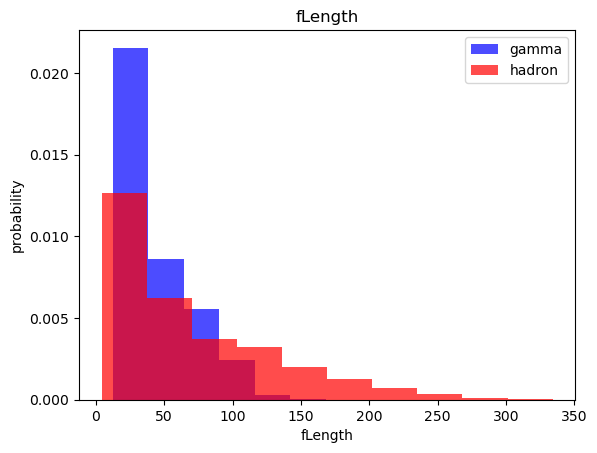

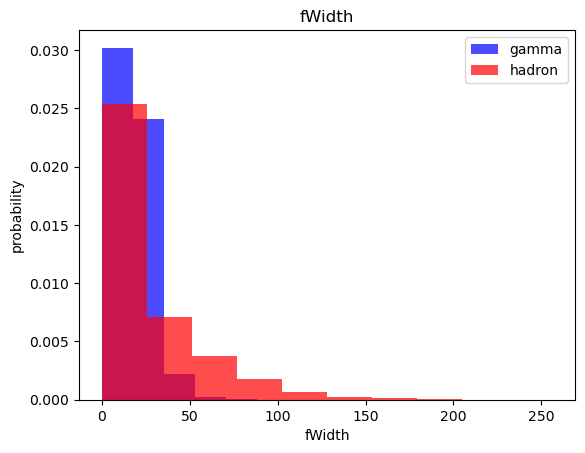

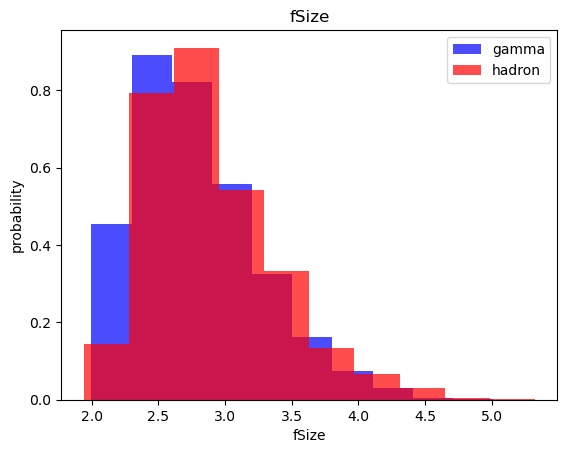

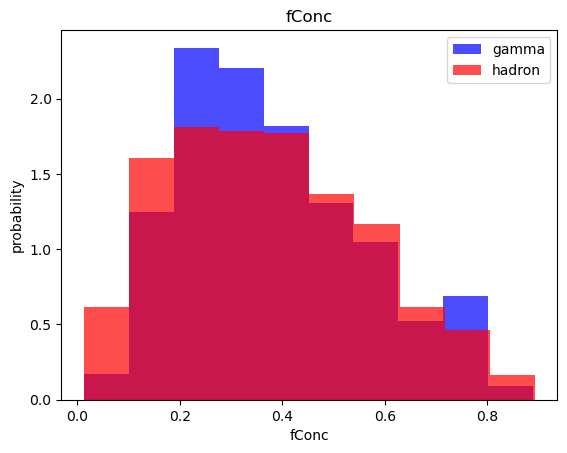

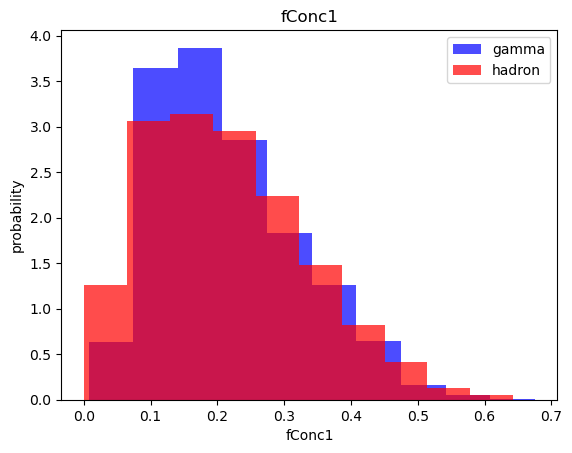

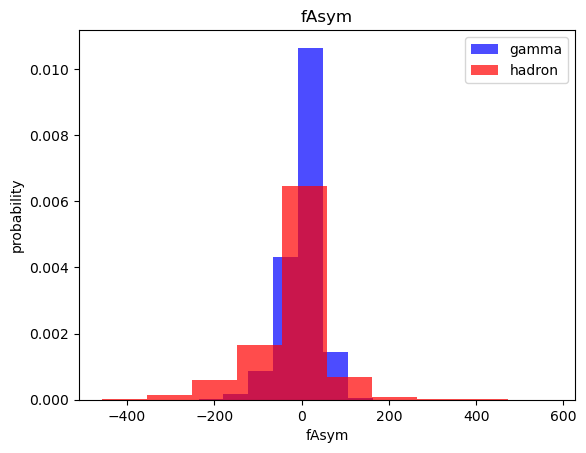

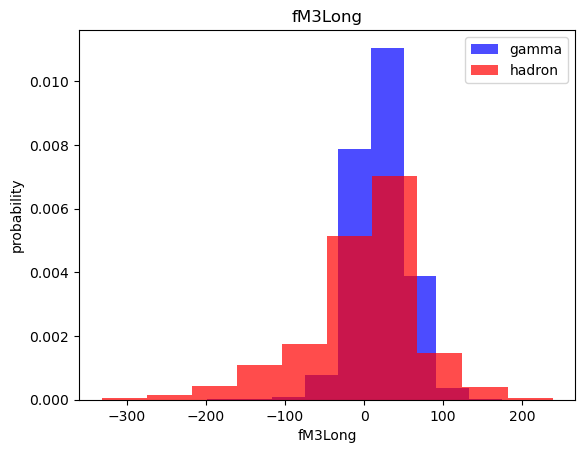

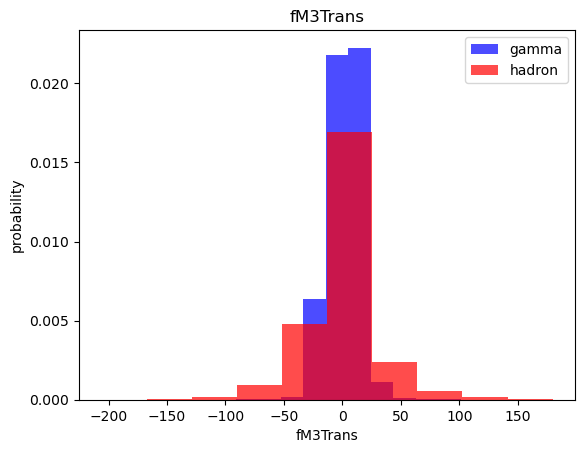

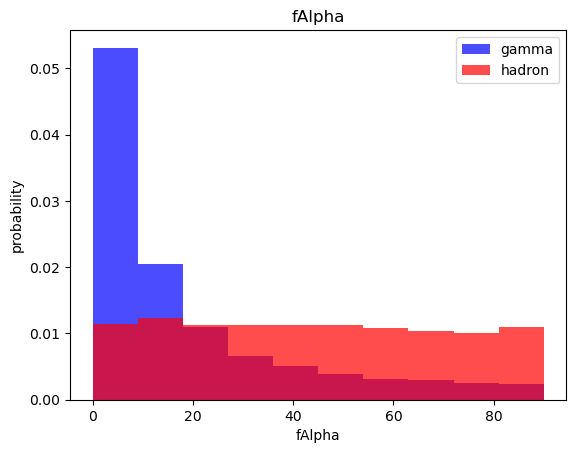

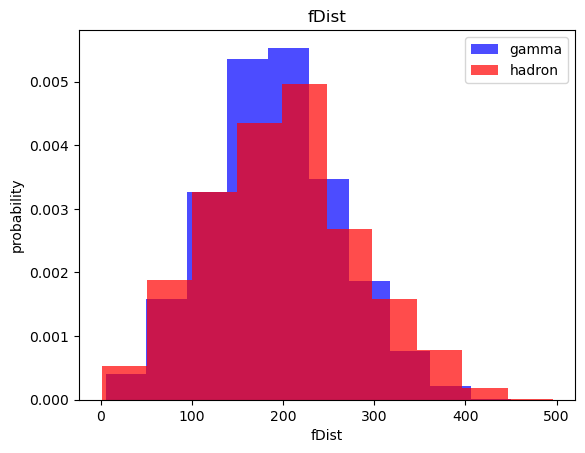

In [7]:
for label in lista_nazw[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [26]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/home/imac/miniforge3/envs/myenv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [27]:
def scale_dataset(dataframe, oversampling=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaller = StandardScaler()
    X = scaller.fit_transform(X)

    if oversampling:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X,y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y    

In [28]:
train, X_train, y_train = scale_dataset(train, oversampling=True)
valid, X_valid, y_valid = scale_dataset(valid, oversampling=False)
test, X_test, y_test = scale_dataset(test, oversampling=False)

kNN nethod

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [39]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)
test

In [1]:
print(classification_report(y_test, y_pred))

NameError: name 'classification_report' is not defined